In [1]:
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import pandas as pd
import cPickle as pickle


bases = 'acgt'
lett_to_index = dict(zip(bases,range(4)))

data = pd.read_csv("filter_data_sorted.csv")

platereader = pd.read_csv("Magdalena_plate_reader.txt", header=None, sep="\t")

In [2]:
platereader.columns=["sequence","luminosity"]
indices = [data[[ss.find(s.lower())>0 for ss in data.sequence ]].index for s in platereader.sequence]

pd.Series(map(len, indices)).value_counts()

1    77
0     2
dtype: int64

In [3]:
platereader["found_index"] = [i[0] if len(i) else np.nan for i in indices]
platereader = platereader[~platereader.isna().any(1)]

In [4]:
platereader["found_index"] = platereader["found_index"].astype(int)

In [28]:
binEdges = np.log10(np.array("42	78	144	267	495	917	1698	3146	5827	10796	20000".split(),dtype=float))

In [6]:
for c in data.columns[1:]:
    platereader[c] = data.loc[platereader.found_index,c].values

ff = platereader.expr_bin_units<2.5

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [9]:
platereader.luminosity = np.log10(platereader.luminosity)

(-0.5, 11.5)

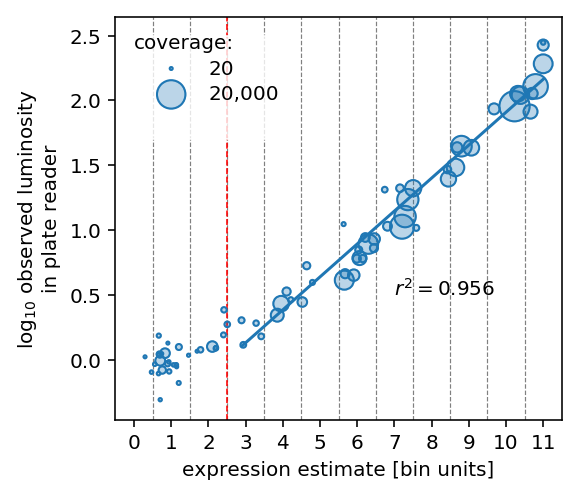

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(4,3.7), sharey=True)
s = platereader.coverage/100+2
seg = np.array([20,20000])/100+2

ax.scatter(platereader.expr_bin_units, platereader.luminosity, s=s, edgecolor="C0", c='none')
ax.scatter(platereader.expr_bin_units, platereader.luminosity, s=s, alpha = .3)
# axs[1].scatter([1]*len(seg), [platereader.luminosity.max()/2], s=s.max(), edgecolor="C0", c='none')

x = [1]*len(seg)
y = platereader.luminosity.max()+((-np.arange(len(seg))-1)*.2)
ax.scatter(x, y, s=seg, alpha = .3,c="C0")
ax.scatter(x, y, s=seg, edgecolor="C0", c='none')
ax.text(0,platereader.luminosity.max(), "coverage:", va="center")
ax.text(2,y[0], 20, va="center")
ax.text(2,y[1], "20,000", va="center")

ax.set_xlabel("expression estimate [bin units]")




x = platereader.expr_bin_units.values[~ff]
y = platereader.luminosity.values[~ff]
lr.fit(x.reshape(-1,1), y)
score = lr.score(x.reshape(-1,1), y)
x.sort()
x = x[1:]
ax.plot(x, lr.predict(x.reshape(-1,1)), "C0")
ax.text(7,.5,r"$r^2=%.3f$"%(score))
ax.set_ylabel("$\log_{10}$ observed luminosity\nin plate reader")

for be in np.arange(11)+.5:
    ax.axvline(be,lw=.6,color="grey",ls="--", zorder = -100)
ax.axvline(2.5,lw=.8,color="red",ls="--",zorder=-99)
ax.fill_between([-.3,4.3],[2.5,2.5],[1.7,1.7], color="w",alpha = .8, zorder = -10)
plt.xticks(range(12))
ax.set_xlim(-.5,11.5)

In [29]:


# x = platereader.log10_FACS_est.values[~ff]
# y = np.log(platereader.luminosity.values)[~ff]
# lr.fit(x.reshape(-1,1), y)
# score = lr.score(x.reshape(-1,1), y)
# x.sort()
# x = x[1:]
# axs[0].plot(10**x, np.exp(lr.predict(x.reshape(-1,1))), "C0")
# axs[0].text(2e3,5,r"$r^2=%.3f$"%(score))


# for be in binEdges:
#     axs[0].axvline(be,lw=.6,color="grey",ls="--")
# axs[0].axvline(binEdges[2],lw=.8,color="red",ls="--")
# for be in np.arange(11)+.5:
#     axs[1].axvline(be,lw=.6,color="grey",ls="--", zorder = -100)
# axs[1].axvline(2.5,lw=.8,color="red",ls="--",zorder=-99)

# axs[1].fill_between([-.3,4.3],[350,350],[70,70], color="w",alpha = .8, zorder = -10)
# axs[1].set_xlim(-.5,11.5)

# # axs[0].grid(axis="y", lw=.6, which="both")
# plt.xticks(range(12))
# plt.tight_layout()
# plt.savefig("report_magdalena/facsEst_binEst_vs_plate_reader.png", dpi = 300)

In [62]:
plt.rcParams["font.size"] = 10

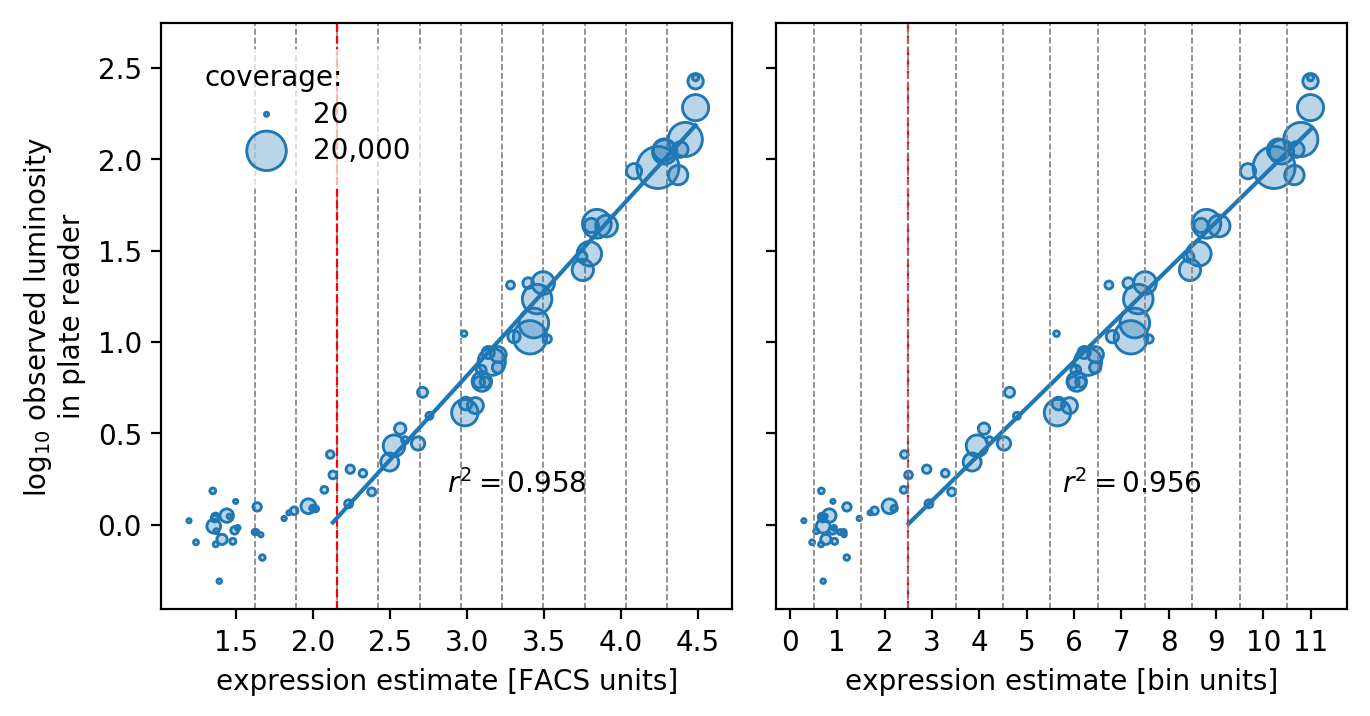

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(7,3.7), sharey=True)
s = platereader.coverage/100+2
seg = np.array([20,20000])/100+2
axs[0].scatter(platereader.log10_FACS_est, platereader.luminosity, s=s, edgecolor="C0", c='none')
axs[0].scatter(platereader.log10_FACS_est, platereader.luminosity, s=s, alpha = .3)
axs[1].scatter(platereader.expr_bin_units, platereader.luminosity, s=s, edgecolor="C0", c='none')
axs[1].scatter(platereader.expr_bin_units, platereader.luminosity, s=s, alpha = .3)

ax = axs[0]
x = [1.7]*len(seg)
y = platereader.luminosity.max()+((-np.arange(len(seg))-1)*.2)
ax.scatter(x, y, s=seg, alpha = .3,c="C0")
ax.scatter(x, y, s=seg, edgecolor="C0", c='none')
ax.text(1.3,platereader.luminosity.max(), "coverage:", va="center")
ax.text(2,y[0], 20, va="center")
ax.text(2,y[1], "20,000", va="center")

axs[0].set_xlabel("expression estimate [FACS units]")
axs[1].set_xlabel("expression estimate [bin units]")
axs[0].set_ylabel(r"$\log_{10}$ "+"observed luminosity\nin plate reader")


for k,ax in zip(["log10_FACS_est", "expr_bin_units"],axs):
    x = platereader[k].values[~ff]
    y = platereader.luminosity.values[~ff]
    lr.fit(x.reshape(-1,1), y)
    score = lr.score(x.reshape(-1,1), y)
    x.sort()
    # x = x[1:]
    ax.plot(x, lr.predict(x.reshape(-1,1)), "C0")
    ax.text(.5,.2,r"$r^2=%.3f$"%(score), transform=ax.transAxes)
for be in binEdges:
    axs[0].axvline(be,lw=.6,color="grey",ls="--", zorder = -100)
axs[0].axvline(binEdges[2],lw=.8,color="red",ls="--", zorder = -100)
for be in np.arange(11)+.5:
    axs[1].axvline(be,lw=.6,color="grey",ls="--")
axs[1].axvline(2.5,lw=.8,color="red",ls="--",zorder=-99)
axs[0].fill_between([1.2,2.8],[2.6,2.6],[1.85,1.85], color="w",alpha = .7, zorder = -10)
plt.xticks(range(12))
axs[0].set_xticks(np.arange(1.5,5,.5))
axs[0].set_xticklabels(np.arange(1.5,5,.5))
plt.tight_layout()
plt.savefig("report_magdalena/facsEst_binEst_vs_plate_reader.png", dpi = 300)